# Processing time with `pandas`

Let's open up some data from [the Census bureau](https://www.census.gov/econ/currentdata/datasets/) - we're going to use **New Home Sales**. The data is formatted... oddly, so I've cleaned it up for you as **home-sales.csv** inside of the **data** folder.

Open it **without moving it**. Tab autocomplete will help you.

In [1]:
import pandas as pd
df = pd.read_csv ("home-sales.csv")
df.head()

/Users/paromasoni/.pyenv/versions/3.8.2/lib/python3.8/site-packages/pandas/compat/__init__.py:120: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


,is_adj,val,cat_code,cat_desc,cat_indent,dt_code,dt_desc,dt_unit,geo_code,geo_desc,per_name
0,0,42.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States,1963-01-01
1,0,35.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States,1963-02-01
2,0,44.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States,1963-03-01
3,0,52.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States,1963-04-01
4,0,58.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States,1963-05-01


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 641 entries, 0 to 640
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   is_adj      641 non-null    int64  
 1   val         641 non-null    float64
 2   cat_code    641 non-null    object 
 3   cat_desc    641 non-null    object 
 4   cat_indent  641 non-null    int64  
 5   dt_code     641 non-null    object 
 6   dt_desc     641 non-null    object 
 7   dt_unit     641 non-null    object 
 8   geo_code    641 non-null    object 
 9   geo_desc    641 non-null    object 
 10  per_name    641 non-null    object 
dtypes: float64(1), int64(2), object(8)
memory usage: 55.2+ KB


## Creating a datetime column

In [3]:
df['date'] = pd.to_datetime(df.per_name)
df.head()

,is_adj,val,cat_code,cat_desc,cat_indent,dt_code,dt_desc,dt_unit,geo_code,geo_desc,per_name,date
0,0,42.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States,1963-01-01,1963-01-01
1,0,35.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States,1963-02-01,1963-02-01
2,0,44.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States,1963-03-01,1963-03-01
3,0,52.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States,1963-04-01,1963-04-01
4,0,58.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States,1963-05-01,1963-05-01


## Changing the index to the datetime

Normally the index of the column is just a number.

In [4]:
df = df.set_index('date')
df.head()

,is_adj,val,cat_code,cat_desc,cat_indent,dt_code,dt_desc,dt_unit,geo_code,geo_desc,per_name
date,,,,,,,,,,,
1963-01-01,0,42.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States,1963-01-01
1963-02-01,0,35.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States,1963-02-01
1963-03-01,0,44.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States,1963-03-01
1963-04-01,0,52.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States,1963-04-01
1963-05-01,0,58.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States,1963-05-01


It's the column on the far left - `0`, `1`, `2`, `3`, `4`... boring and useless! If we use **.set_index** to replace the index with the datetime, though, we can start to have some fun

## Selecting specific(-ish) dates via the index

Now that our index is a datetime, we can select date ranges super super easily.

### Selecting by month

Select every row from March, 1999.

In [5]:
df['1999-03']

,is_adj,val,cat_code,cat_desc,cat_indent,dt_code,dt_desc,dt_unit,geo_code,geo_desc,per_name
date,,,,,,,,,,,
1999-03-01,0,84.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States,1999-03-01


### Selecting by year

Select every row from 1996.

In [6]:
df['1996']

,is_adj,val,cat_code,cat_desc,cat_indent,dt_code,dt_desc,dt_unit,geo_code,geo_desc,per_name
date,,,,,,,,,,,
1996-01-01,0,54.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States,1996-01-01
1996-02-01,0,68.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States,1996-02-01
1996-03-01,0,70.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States,1996-03-01
1996-04-01,0,70.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States,1996-04-01
1996-05-01,0,69.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States,1996-05-01
1996-06-01,0,65.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States,1996-06-01
1996-07-01,0,66.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States,1996-07-01
1996-08-01,0,73.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States,1996-08-01
1996-09-01,0,62.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States,1996-09-01


## List slices with datetimes

Just for review, you can use `:` to only select certain parts of a list. This is called **list slicing**.

In [7]:
# Make our list of fruits
ranked_fruits = ('banana', 'orange', 'apple', 'blueberries', 'strawberries')


In [8]:
# Start from the beginning, get the first two
ranked_fruits[:2]

('banana', 'orange')

In [9]:
# Start from two, get up until the fourth element
ranked_fruits[2:4]

('apple', 'blueberries')

In [10]:
# Starting from the third element, get all the rest
ranked_fruits[3:]

('blueberries', 'strawberries')

Instead of using boring ol' numbers, we can use **dates instead**.

### Getting rows after a certain date

Select everything *after* March 3rd, 1999.

In [11]:
df['1999-03-03':]

,is_adj,val,cat_code,cat_desc,cat_indent,dt_code,dt_desc,dt_unit,geo_code,geo_desc,per_name
date,,,,,,,,,,,
1999-04-01,0,86.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States,1999-04-01
1999-05-01,0,80.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States,1999-05-01
1999-06-01,0,82.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States,1999-06-01
1999-07-01,0,78.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States,1999-07-01
1999-08-01,0,78.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States,1999-08-01
...,...,...,...,...,...,...,...,...,...,...,...
2016-01-01,0,39.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States,2016-01-01
2016-02-01,0,45.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States,2016-02-01
2016-03-01,0,49.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States,2016-03-01


### Getting rows between a certain date

Select everything *before* July 9th, 1987.

In [12]:
df[:'1987-07-09']

,is_adj,val,cat_code,cat_desc,cat_indent,dt_code,dt_desc,dt_unit,geo_code,geo_desc,per_name
date,,,,,,,,,,,
1963-01-01,0,42.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States,1963-01-01
1963-02-01,0,35.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States,1963-02-01
1963-03-01,0,44.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States,1963-03-01
1963-04-01,0,52.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States,1963-04-01
1963-05-01,0,58.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States,1963-05-01
...,...,...,...,...,...,...,...,...,...,...,...
1987-03-01,0,73.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States,1987-03-01
1987-04-01,0,72.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States,1987-04-01
1987-05-01,0,62.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States,1987-05-01


# Info on our time series

If you try to `.plot`, pandas will automatically use the index (the date) as the x axis for you. This makes like **perfect.** because you don't have to think about anything, and calculations automatically have a good axis.

Graph the number of home sales over time.

<AxesSubplot:xlabel='date'>

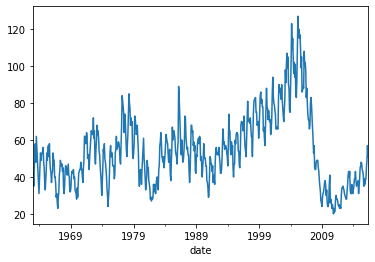

In [13]:
df.val.plot()

## Grouping with resample, not with groupby

Hmmm, looks like something bad might have happened to the housing industry t some point. Maybe we want to see some numbers instead of a graph? To do aggregate statistics on time series in pandas we use a method called `.resample()`, and we're going to tell it **to group the data by year.**

When we tell it to group by year, we need to give it a **special code**. I always get mine from this StackOverflow post http://stackoverflow.com/a/17001474 because it's much more convenient than the pandas documentation.

Get the total number of house sales by year.

*Note: if we didn't have a datetime index, we would use `on='colname'` to specify the column we're resampling on*

In [14]:
df.resample('A').val.sum()

date
1963-12-31     560.0
1964-12-31     565.0
1965-12-31     575.0
1966-12-31     461.0
1967-12-31     488.0
1968-12-31     490.0
1969-12-31     449.0
1970-12-31     486.0
1971-12-31     657.0
1972-12-31     718.0
1973-12-31     633.0
1974-12-31     519.0
1975-12-31     550.0
1976-12-31     647.0
1977-12-31     820.0
1978-12-31     818.0
1979-12-31     709.0
1980-12-31     545.0
1981-12-31     436.0
1982-12-31     413.0
1983-12-31     622.0
1984-12-31     639.0
1985-12-31     688.0
1986-12-31     748.0
1987-12-31     672.0
1988-12-31     675.0
1989-12-31     650.0
1990-12-31     535.0
1991-12-31     507.0
1992-12-31     608.0
1993-12-31     666.0
1994-12-31     670.0
1995-12-31     665.0
1996-12-31     758.0
1997-12-31     805.0
1998-12-31     885.0
1999-12-31     881.0
2000-12-31     877.0
2001-12-31     909.0
2002-12-31     972.0
2003-12-31    1088.0
2004-12-31    1203.0
2005-12-31    1283.0
2006-12-31    1052.0
2007-12-31     776.0
2008-12-31     485.0
2009-12-31     374.0
2010-12-

Notice that it's **December of every year**. That still looks like too much data, though. What if we zoom out to **every decade** instead?

In [15]:
df.resample('10Y').val.sum()

date
1963-12-31     560.0
1973-12-31    5522.0
1983-12-31    6079.0
1993-12-31    6388.0
2003-12-31    8510.0
2013-12-31    6598.0
2023-12-31    1181.0
Freq: 10A-DEC, Name: val, dtype: float64

Cool, right?

### Graphing

We can graph these instead of just look at them! Plot all of our years of housing sales, by decade.

*Note: What is the best kind of graph for this?*

<AxesSubplot:ylabel='date'>

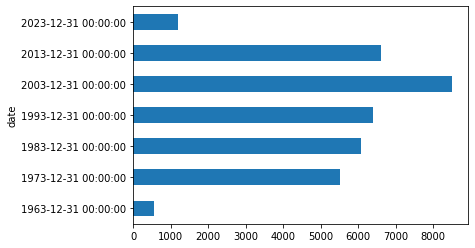

In [16]:
df.resample('10Y').val.sum().plot(
    kind='barh')

## Cyclical data (actually using groupby)

### What were the top 5 worst months?

Start by just simply sorting the dataset to find the top five months that were worst for home sales.

In [17]:
#df.resample('M').val.head()

In [18]:
df.val.sort_values(ascending=True).head()

date
2010-11-01    20.0
2011-01-01    21.0
2011-02-01    22.0
2010-08-01    23.0
2010-10-01    23.0
Name: val, dtype: float64

It seems like there might be a cycle ever year. Maybe houses are sold in the summer and not the winter? To do this we can't use resample - it's for putting time into buckets - we need to **group by the month.**

### Getting the month

We can't ask for the index column as "year" any more, but we can just use `df.index` instead. Look at the date by typing `df.index`.

In [19]:
df.index.month

Int64Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10,
            ...
             8,  9, 10, 11, 12,  1,  2,  3,  4,  5],
           dtype='int64', name='date', length=641)

To get the month of each date, it's simply `df.index.month`. If it were a column we would use `df.col_name.dt.month`. Why do we only have to use `.dt` when it's a normal column, and not when it's an index? **I have no idea.**

Look at the month of each row with `df.index.month`.

In [20]:
#df.groupby(df.index.month).head()

### Doing the groupby to view data by month

So when we do our groupby, we'll say **hey, we made the groups for you already**. Then we ask for the median number of houses sold. Find the mean number of houses sold each month by using `.groupby(by=df.index.month)`.

In [21]:
df.groupby(by=df.index.month).mean()

,is_adj,val,cat_indent
date,,,
1,0,47.685185,0
2,0,53.592593,0
3,0,62.685185,0
4,0,61.444444,0
5,0,61.129630,0
6,0,59.188679,0
7,0,56.735849,0
8,0,57.566038,0
9,0,52.037736,0


### Plot the results

<AxesSubplot:ylabel='date'>

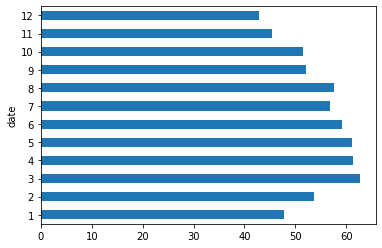

In [22]:
df.val.groupby(by=df.index.month).mean().plot(
    kind = 'barh')

# More details

You can also use **max** and **min** and all of your other aggregate friends with `.resample`. For example, what's the **largest number of houses hold in a given year?**

In [28]:
df.resample('A').val.max().sort_values(ascending=False)
# I don't know if this is correct, because it doesn't say in which month of each year the max number of houses sold were

date
2005-12-31    127.0
2004-12-31    123.0
2006-12-31    108.0
2003-12-31    107.0
2001-12-31     94.0
2002-12-31     90.0
1986-12-31     89.0
2000-12-31     88.0
1999-12-31     86.0
1978-12-31     85.0
1977-12-31     84.0
2007-12-31     83.0
1998-12-31     83.0
1997-12-31     81.0
1994-12-31     74.0
1979-12-31     73.0
1987-12-31     73.0
1996-12-31     73.0
1972-12-31     72.0
1988-12-31     68.0
1973-12-31     68.0
1985-12-31     67.0
1993-12-31     66.0
1995-12-31     64.0
1983-12-31     64.0
1971-12-31     64.0
1984-12-31     63.0
1976-12-31     62.0
1989-12-31     62.0
1963-12-31     62.0
1980-12-31     61.0
1974-12-31     58.0
1965-12-31     58.0
1990-12-31     58.0
1975-12-31     57.0
2016-12-31     57.0
1964-12-31     56.0
1992-12-31     56.0
1966-12-31     53.0
1991-12-31     51.0
1981-12-31     49.0
2008-12-31     49.0
1967-12-31     49.0
1970-12-31     48.0
2015-12-31     48.0
1968-12-31     47.0
1969-12-31     44.0
2013-12-31     43.0
2014-12-31     43.0
2010-12-31     

How about the fewest?

In [29]:
df.resample('A').val.min().sort_values()

date
2010-12-31    20.0
2011-12-31    21.0
2012-12-31    23.0
1966-12-31    23.0
2009-12-31    24.0
1974-12-31    24.0
2008-12-31    26.0
1981-12-31    27.0
1969-12-31    28.0
1982-12-31    28.0
1967-12-31    29.0
1970-12-31    29.0
1975-12-31    29.0
1990-12-31    29.0
1991-12-31    30.0
1973-12-31    30.0
1963-12-31    31.0
2013-12-31    31.0
2014-12-31    31.0
1968-12-31    32.0
1980-12-31    33.0
1964-12-31    33.0
1979-12-31    35.0
2015-12-31    35.0
1965-12-31    37.0
1987-12-31    37.0
1984-12-31    38.0
2016-12-31    39.0
1989-12-31    40.0
1994-12-31    40.0
1976-12-31    41.0
1992-12-31    42.0
1988-12-31    42.0
1993-12-31    44.0
1971-12-31    44.0
1983-12-31    44.0
2007-12-31    44.0
1995-12-31    45.0
1972-12-31    47.0
1985-12-31    47.0
1986-12-31    48.0
1978-12-31    50.0
1977-12-31    51.0
1997-12-31    51.0
1996-12-31    51.0
1999-12-31    57.0
1998-12-31    61.0
2000-12-31    63.0
2001-12-31    66.0
2002-12-31    66.0
2006-12-31    71.0
2003-12-31    75.0
2004-12